In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def is_non_speaking_subtitle(subtitle):
    return subtitle.startswith('[') and subtitle.endswith(']')

def load_and_process_data(input_file_name):
    mean_time_deltas = []

    with open(input_file_name, 'r') as input_file:
        for line in input_file:
            data = json.loads(line)
            duration = data["duration"]
            if duration < 420:
                continue
            mean_time_delta = calculate_mean_time_delta(data)
            mean_time_deltas.append(mean_time_delta)

    return mean_time_deltas

def calculate_mean_time_delta(data):
    subtitles_t_start = data["subtitles_t_start"]
    subtitles_t_end = data["subtitles_t_end"]
    subtitles_words = data["subtitles_words"]

    time_deltas = []
    i = 0
    while i < len(subtitles_words) - 1:
        if is_non_speaking_subtitle(subtitles_words[i+1]):
            if i+2 < len(subtitles_t_start):
                time_deltas.append(subtitles_t_start[i+2] - subtitles_t_end[i])
                i += 2
            else:
                break
        else:
            time_deltas.append(subtitles_t_start[i+1] - subtitles_t_end[i])
            i += 1

    return np.mean(time_deltas)

def plot_cumulative_distribution(mean_time_deltas, min_val, max_val):
    interval_count = 100
    interval_size = (max_val - min_val) / interval_count
    counts = [0] * interval_count

    for delta in mean_time_deltas:
        if min_val <= delta < max_val:
            idx = int((delta - min_val) / interval_size)
            if idx == interval_count:
                idx -= 1
            counts[idx] += 1

    cumulative_counts = np.cumsum(counts)
    total_videos = len(mean_time_deltas)

    bin_edges = [min_val + i * interval_size for i in range(interval_count + 1)]
    plt.figure(figsize=(20, 5))
    plt.plot(bin_edges[:-1], cumulative_counts, marker='o', linestyle='-')

    plt.title('Cumulative Distribution of Average Subtitle Time Gap')
    plt.xlabel('Average Subtitle Time Gap (s)')
    plt.ylabel('Total Number of Videos')
    ticks = np.arange(0, max_val + 0.025, 0.025)
    plt.xticks(ticks)
    plt.axhline(total_videos, color='green', linestyle='--', label=f'Total videos: {total_videos}')
    plt.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
    plt.grid(False)
    plt.savefig("cumulative_distribution_plot.png")

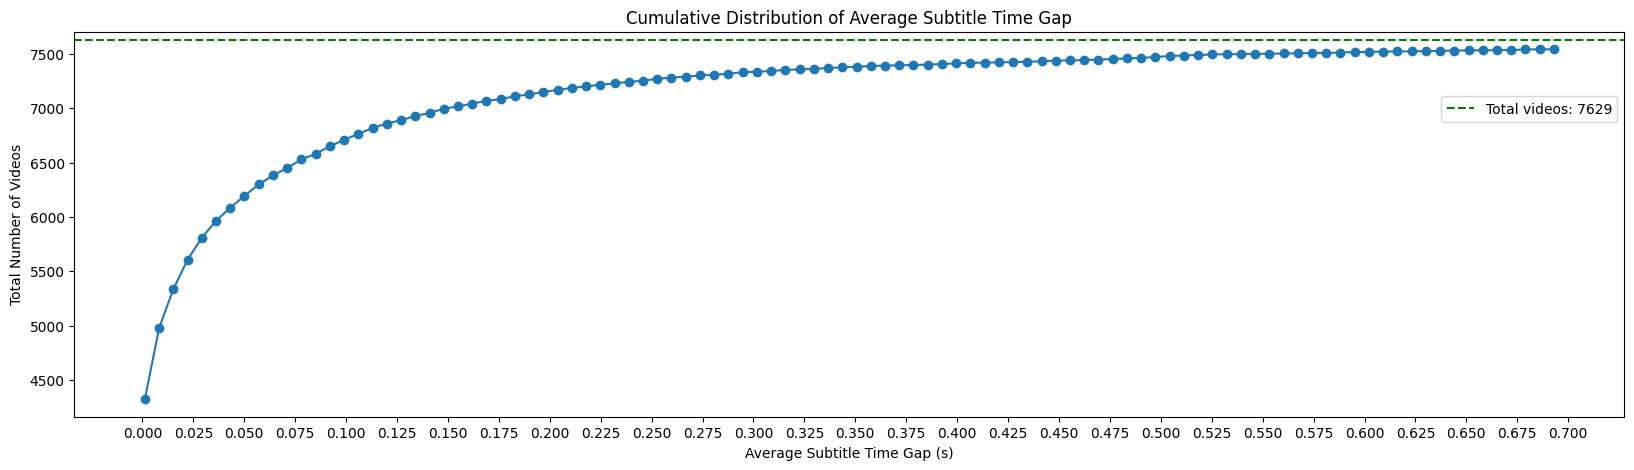

In [3]:
input_file_name = "/Users/jackgengqc/Desktop/yttemporal1b_train_0000of1024.jsonl"
mean_time_deltas = load_and_process_data(input_file_name)
min_val = min(mean_time_deltas)
max_val = 0.7
plot_cumulative_distribution(mean_time_deltas, min_val, max_val)